In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,LSTM,Embedding,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

# FAKE NEWS

In [ ]:
fake = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<Axes: >

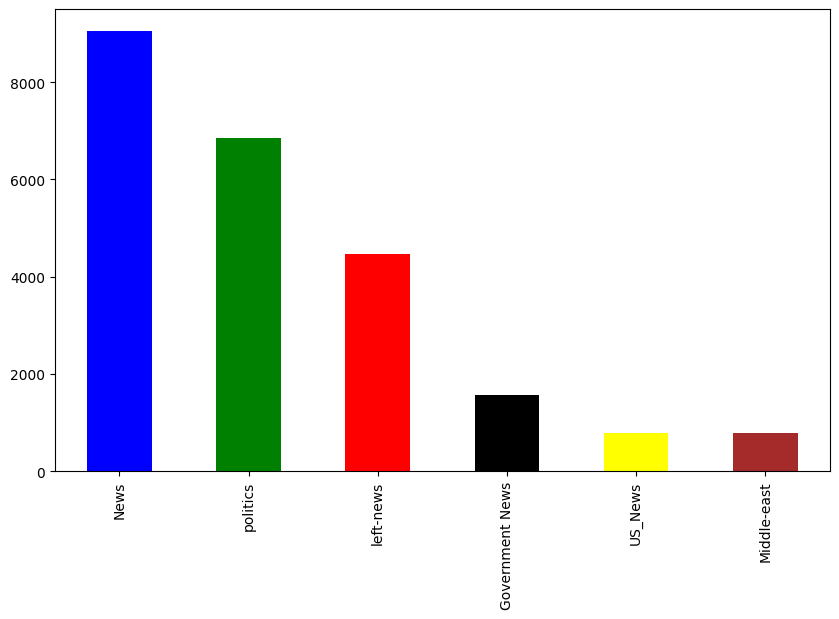

In [ ]:
plt.figure(figsize=(10,6))
fake.subject.value_counts().plot(kind='bar',color=['blue','green','red','black','yellow','brown'])
# sns.countplot(fake.subject)

# WORDCLOUD

In [ ]:
fk = ' '.join(fake['text'].tolist())

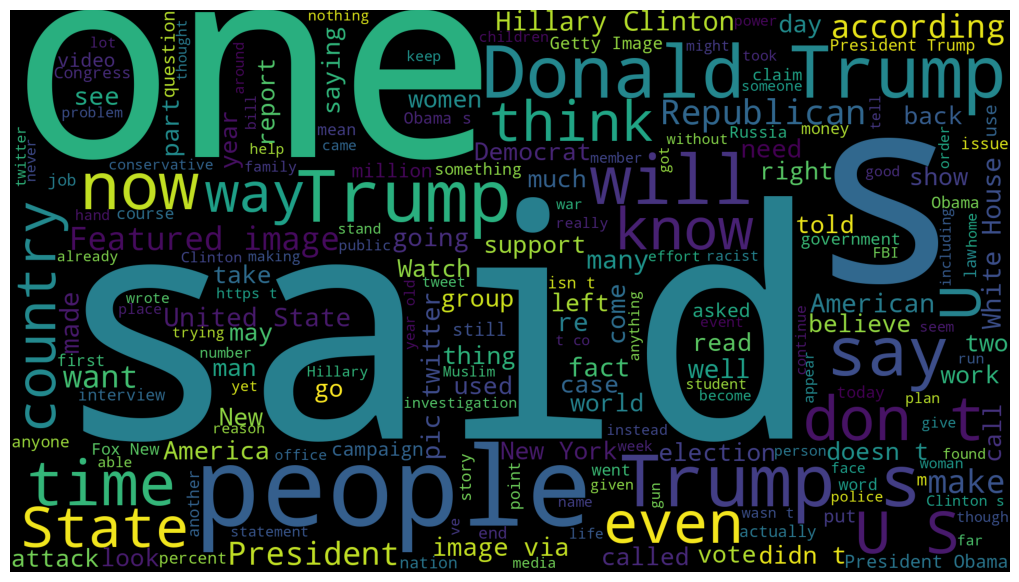

In [ ]:
wrdcld = WordCloud(width=1920,height = 1080).generate(fk)
plt.figure(figsize=(10,10))
plt.imshow(wrdcld)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# REAL NEWS

In [ ]:
real = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv")
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
real.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

<Axes: >

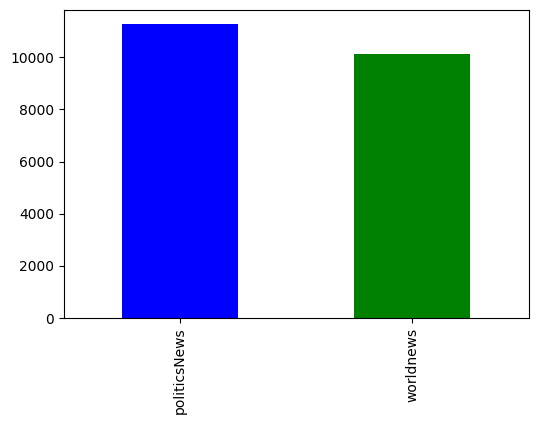

In [ ]:
plt.figure(figsize=(6,4))
real.subject.value_counts().plot(kind='bar',color=['blue','green'])
# sns.countplot(real.subject)

# WORDCLOUD

In [ ]:
rl = ' '.join(real['text'].tolist())

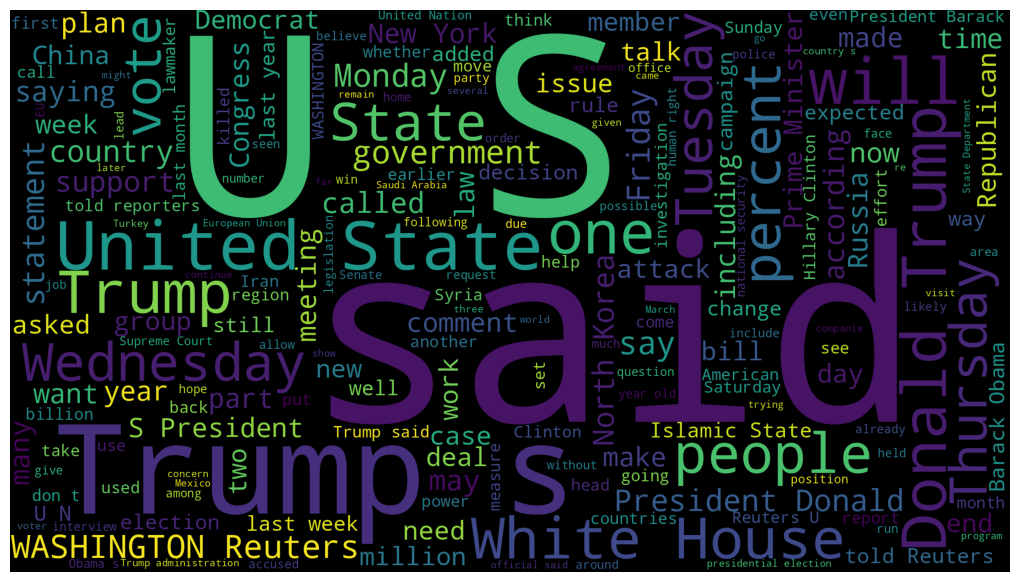

In [ ]:
wrdcld = WordCloud(width=1920,height = 1080).generate(rl)
plt.figure(figsize=(10,10))
plt.imshow(wrdcld)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
unknown_publishers = []

for index,row in enumerate(real.text.values):
    try :
        rec = row.split('-',maxsplit=1)
        assert(len(rec[0])<120)

    except:
        unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

221

In [ ]:
real.iloc[unknown_publishers]

,title,text,subject,date
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
12,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...,The following statements were posted to the ve...,politicsNews,"December 28, 2017"
13,"Trump on Twitter (Dec 27) - Trump, Iraq, Syria",The following statements were posted to the ve...,politicsNews,"December 28, 2017"
14,Man says he delivered manure to Mnuchin to pro...,"(In Dec. 25 story, in second paragraph, corre...",politicsNews,"December 25, 2017"
...,...,...,...,...
20135,China's big money trumps U.S. influence in Cam...,(Story corrects to million from billion in pa...,worldnews,"September 11, 2017"
20500,UK publisher rejected request to block academi...,"(This Sept 8 story corrects headline, clarifi...",worldnews,"September 8, 2017"
20667,Rohingya say their village is lost to Myanmar'...,"(Story refiles to add dropped word not , in ...",worldnews,"September 7, 2017"
21246,'Gates of Hell': Iraqi army says fighting near...,(Story corrects third paragraph to show Mosul...,worldnews,"August 29, 2017"


In [ ]:
for i in real['text']:
    if i == ' ':
        print(real[real['text']==i].index)

Int64Index([8970], dtype='int64')


In [ ]:
# we have a row in text columns that is empty  so we can drop that
real.drop(8970,inplace=True)

In [ ]:
publisher = []
tmp_txt= []

for index,row in enumerate(real['text'].values):
    if index in unknown_publishers:
        publisher.append('unknown')
        tmp_txt.append(row)
    else :
        rec = row.split('-',maxsplit = 1)
        publisher.append(rec[0].strip())
        tmp_txt.append(rec[1].strip())

In [ ]:
real['text'] = tmp_txt
real['publisher'] = publisher

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


# now treating fake news dataset

In [ ]:
fake_empty = [i for i,news in enumerate(fake['text']) if news.strip()=='']

In [ ]:
fake.iloc[fake_empty]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
fake.iloc[fake_empty,1] = fake.iloc[fake_empty,0]

In [ ]:
real['text'] = real['text'].apply(lambda x: x.lower())
fake['text'] = fake['text'].apply(lambda x: x.lower())

# preprocessing text

In [ ]:
real['class'] = 1
fake['class'] = 0

In [ ]:
print(real.columns)
print(fake.columns)

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')
Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')


In [ ]:
real_df = real[['text','class']]
fake_df = fake[['text','class']]

In [ ]:
df = pd.concat([real_df,fake_df],ignore_index=True)
df.sample(5)

,text,class
7984,"in december 2013, as the “bridgegate” scandal ...",1
11049,donald trump was the big winner across social ...,1
288,u.s. senate republicans agreed to talks with t...,1
30554,new jersey republican governor chris christie ...,0
43499,consortium news exclusive: the mainstream medi...,0


In [ ]:
df['text'] = df['text'].apply(lambda x: re.sub('[^\w ]+' , "" , x))

In [ ]:
df.head()

,text,class
0,the head of a conservative republican faction ...,1
1,transgender people will be allowed for the fir...,1
2,the special counsel investigation of links bet...,1
3,trump campaign adviser george papadopoulos tol...,1
4,president donald trump called on the us postal...,1


In [ ]:
y = df['class']

In [ ]:
x = [i.split() for i in df['text'].tolist()]

In [ ]:
print(x[0])

['the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues', 'such', 'as', 'immigration', 'policy', 'even', 'as', 'the', 'november', 'congressional', 'e

In [ ]:
import gensim

In [ ]:
dim = 100
wrd2vc = gensim.models.Word2Vec(sentences = x , vector_size = dim , window = 10 ,  min_count = 1 )

In [ ]:
len(wrd2vc.wv.key_to_index)

228348

In [ ]:
wrd2vc.wv.most_similar('obama')

[('obamathe', 0.8292853832244873),
 ('obamas', 0.8193916082382202),
 ('obamain', 0.7207584381103516),
 ('obamaas', 0.6760409474372864),
 ('obamaeric', 0.6695952415466309),
 ('obamawe', 0.661315381526947),
 ('megafundraiser', 0.6475976705551147),
 ('legacylist', 0.640018105506897),
 ('obama1', 0.6318007707595825),
 ('obamaif', 0.6240519285202026)]

In [ ]:
wrd2vc.wv['trump']

array([ 2.4281263 ,  3.1495814 , -2.0256808 , -2.3138118 , -0.25175267,
       -2.0522814 , -3.34339   , -2.314748  , -1.4550775 , -2.2583194 ,
       -3.511188  ,  0.6632354 , -2.5932977 ,  2.0447025 , -0.92293507,
        3.6293364 , -1.4301196 ,  0.13250852,  3.1211267 ,  1.8806273 ,
       -3.4624765 , -2.065177  , -0.2856262 , -4.3686056 ,  0.39095086,
        2.8345518 , -5.3606796 ,  1.2009983 , -2.3148506 , -4.485022  ,
       -2.3715863 , -2.281753  ,  0.6243863 ,  3.8192098 ,  1.6985631 ,
        1.3424009 , -0.51753   , -3.4469888 , -6.6659617 ,  2.8224685 ,
        3.8459651 ,  0.5681044 , -0.23805283,  3.5017157 ,  2.6003041 ,
       -3.577398  ,  1.5522808 , -2.3770254 , -1.1712635 , -2.521988  ,
       -4.864037  , -3.0764742 ,  4.3464775 ,  1.8821591 , -0.373539  ,
       -0.5586276 ,  1.333286  , -1.914022  ,  4.8859577 ,  2.0310123 ,
       -0.5475536 , -0.7166124 , -1.6519434 ,  0.49314034,  1.3901078 ,
       -1.2781707 , -3.0886161 ,  1.9715908 ,  0.02588987,  5.82

In [ ]:
tokens = Tokenizer()
tokens.fit_on_texts(x)

In [ ]:
x = tokens.texts_to_sequences(x)

In [ ]:
tokens.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 's': 9,
 'for': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'it': 14,
 'with': 15,
 'trump': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'an': 30,
 'they': 31,
 'us': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'or': 47,
 'more': 48,
 'which': 49,
 'she': 50,
 'after': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'all': 56,
 'out': 57,
 'what': 58,
 'when': 59,
 'state': 60,
 'also': 61,
 'new': 62,
 'there': 63,
 'up': 64,
 'no': 65,
 'over': 66,
 'donald': 67,
 'our': 68,
 'states': 69,
 'house': 70,
 'government': 71,
 'can': 72,
 'clinton': 73,
 'so': 74,
 'than': 75,
 'obama': 76,
 'other': 77,
 'him': 78,
 'just': 79,
 'some': 80,
 'republic

In [ ]:
for key,value in tokens.word_index.items():
    if value == 1:
         print(key)

the


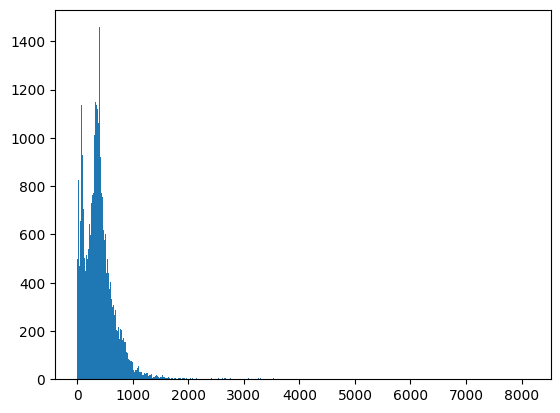

In [ ]:
plt.hist([len(i) for i in x],bins = 700 )
plt.show()

In [ ]:
print(min([len(i) for i in x]))
print(max([len(i) for i in x]))

1
8122


In [ ]:
arr = np.array([len(i) for i in x])
len(arr[arr>1000])

1500

In [ ]:
max_length = 1000
x = pad_sequences( x , maxlen = max_length)

In [ ]:
print(min([len(i) for i in x]))
print(max([len(i) for i in x]))

1000
1000


In [ ]:
vocab_size = len(tokens.word_index)+1
vocab  = tokens.word_index

In [ ]:
def wt_matrix(model):
  weight_matrix = np.zeros((vocab_size , dim))

  for word , ind in vocab.items():
    weight_matrix[ind] = model.wv[word]

  return weight_matrix

In [ ]:
embedded_vectors = wt_matrix(wrd2vc)

In [ ]:
embedded_vectors.shape

(228349, 100)

In [ ]:
model = Sequential()
model.add(Embedding( vocab_size , output_dim = dim , weights = [embedded_vectors] , trainable = False))
model.add(LSTM(units = 128))
model.add(Dense(1,activation = 'sigmoid'))

NameError: ignored

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         22834900  
                                                                 
 lstm_3 (LSTM)               (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22,952,277
Trainable params: 117,377
Non-trainable params: 22,834,900
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['acc'])

In [ ]:
x_train.shape

(33672, 1000)

In [ ]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,stratify = y)

In [ ]:
model.fit(x_train , y_train , validation_split = 0.3,epochs = 6)

Epoch 1/6
737/737 [==============================] - 30s 38ms/step - loss: 0.1333 - acc: 0.9519 - val_loss: 0.0754 - val_acc: 0.9763
Epoch 2/6
737/737 [==============================] - 27s 37ms/step - loss: 0.0545 - acc: 0.9822 - val_loss: 0.0666 - val_acc: 0.9770
Epoch 3/6
737/737 [==============================] - 27s 37ms/step - loss: 0.0356 - acc: 0.9879 - val_loss: 0.0333 - val_acc: 0.9902
Epoch 4/6
737/737 [==============================] - 26s 36ms/step - loss: 0.0158 - acc: 0.9950 - val_loss: 0.0280 - val_acc: 0.9909
Epoch 5/6
737/737 [==============================] - 28s 38ms/step - loss: 0.0089 - acc: 0.9970 - val_loss: 0.0258 - val_acc: 0.9923
Epoch 6/6
737/737 [==============================] - 27s 37ms/step - loss: 0.0078 - acc: 0.9979 - val_loss: 0.0223 - val_acc: 0.9934


In [ ]:
model.evaluate(x_test,y_test)

351/351 [==============================] - 5s 15ms/step - loss: 0.0303 - acc: 0.9919


[0.03025641106069088, 0.9918931126594543]

In [ ]:
def detect(news):
  news = tokens.texts_to_sequences(ttt)
  news = pad_sequences(ttt,maxlen = max_length)

  detector = (model.predict(news,verbose=False)>= 0.5).astype(int)

  if detector==0:
    return(" kya phekre yaaro , chota bacha bhi bolta yeh news fake hai bolke")
  else :
    return("shaktimaan ke amma ki khasam khaake bolrau yeh sachi news hai")

In [ ]:
news1 = [""" a newspaper article from year 1455 said that one day some homeless people came to Ma Aleem and and begged him for some place to live .
           Ma Aleem felt pity and broke some piece of land ,and gave it to those people and today the land is called as america and the people are called americans"""]

print("news 1  :::::   " , detect(news1))

news 1  :::::     kya phekre yaaro , chota bacha bhi bolta yeh news fake hai bolke


In [ ]:
news2 = ["""the head of a conservative republican faction in the u.s. congress, who voted this month for a huge expansion of the national debt to pay for tax cuts,
 called himself a “fiscal conservative” on sunday and urged budget restraint in 2018. in keeping with a sharp pivot under way among republicans, u.s. representative mark meadows, s
 peaking on cbs’ “face the nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in january. when they return from the holidays on wednesday,
 lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the november congressional election campaigns approach in which republicans will seek to keep control of congress. president donald trump and his republicans want a big budget increase in military spending, while democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “the (trump) administration has already been willing to say: ‘we’re going to increase non-defense discretionary spending ... by about 7 percent,’” meadows, chairman of the small but influential house freedom caucus, said on the program. “now, democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. for a fiscal conservative, i don’t see where the rationale is. ... eventually you run out of other people’s money,” he said. meadows was among republicans who voted in late december for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “it’s interesting to hear mark talk about fiscal responsibility,” democratic u.s. representative joseph crowley said on cbs. crowley said the republican tax bill would require the  united states to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “this is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the house of representatives. i think we’re going to be paying for this for many, many years to come,” crowley said. republicans insist the tax package, the biggest u.s. tax overhaul in more than 30 years,  will boost the economy and job growth. house speaker paul ryan, who also supported the tax bill, recently went further than meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top republican priority in 2018. in republican parlance, “entitlement” programs mean food stamps, housing assistance, medicare and medicaid health insurance for the elderly, poor and disabled, as well as other programs created by washington to assist the needy. democrats seized on ryan’s early december remarks, saying they showed republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. but the goals of house republicans may have to take a back seat to the senate, where the votes of some democrats will be needed to approve a budget and prevent a government shutdown. democrats will use their leverage in the senate, which republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “dreamers,” people brought illegally to the country as children. trump in september put a march 2018 expiration date on the deferred action for childhood arrivals, or daca, program, which protects the young immigrants from deportation and provides them with work permits. the president has said in recent twitter messages he wants funding for his proposed mexican border wall and other immigration law changes in exchange for agreeing to help the dreamers. representative debbie dingell told cbs she did not favor linking that issue to other policy objectives, such as wall funding. “we need to do daca clean,” she said.  on wednesday, trump aides will meet with congressional leaders to discuss those issues. that will be followed by a weekend of strategy sessions for trump and republican leaders on jan. 6 and 7, the white house said. trump was also scheduled to meet on sunday with florida republican governor rick scott, who wants more emergency aid. the house has passed an $81 billion aid package after hurricanes in florida, texas and puerto rico, and wildfires in california. the package far exceeded the $44 billion requested by the trump administration. the senate has not yet voted on the aid."""]

print("news 2  :::::   " , detect(news2))

news 2  :::::    shaktiman ke amma ki khasam khaake bolrau yeh sachi news hai
